<a href="https://colab.research.google.com/github/RazvanPorojan/metal_python/blob/master/Recruitment_Fee_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.models import model_from_json
import numpy

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.linear_model import LinearRegression
from sklearn import metrics

Load Data

In [91]:
data = pd.read_csv("target_calc.csv")
data.head(10)


,closed,good_cv,nda,jobs,pay
0,0,4,0,3,1.35
1,0,7,1,4,2.05
2,1,10,1,7,3.35
3,2,20,2,10,5.50
4,3,20,2,10,6.50
5,4,20,4,10,8.50
6,5,22,4,10,9.60
7,1,20,4,10,5.50
8,3,30,4,10,8.00


In [25]:
data.dtypes

closed       int64
good_cv      int64
nda          int64
jobs         int64
pay        float64
dtype: object

In [76]:
data.describe()

,closed,good_cv,nda,jobs,pay
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.111111,17.000000,2.444444,8.222222,5.594444
std,1.763834,8.276473,1.589899,2.862594,2.888062
min,0.000000,4.000000,0.000000,3.000000,1.350000
25%,1.000000,10.000000,1.000000,7.000000,3.350000
50%,2.000000,20.000000,2.000000,10.000000,5.500000
75%,3.000000,20.000000,4.000000,10.000000,8.000000
max,5.000000,30.000000,4.000000,10.000000,9.600000


Plot Data

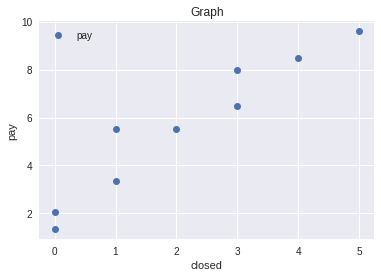

In [77]:
data.plot(x='closed', y='pay', style='o')  
plt.title('Graph')  
plt.xlabel('closed')  
plt.ylabel('pay')  
plt.show()

In [0]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        #self.acc = []
        #self.val_losses = []
        #self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        #self.acc.append(logs.get('acc'))
        #self.val_losses.append(logs.get('val_loss'))
        #self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            #plt.plot(N, self.acc, label = "train_acc")
            #plt.plot(N, self.val_losses, label = "val_loss")
            #plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

Define input and output - Are Xs really independent?

In [0]:
xs = data[["closed","good_cv","nda","jobs"]].to_numpy()
ys = data[["pay"]].to_numpy()
#print(xs)
#print("---")
#print(ys)

Define Keras Model - one neuron

In [35]:
#model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[4])])
#model.compile(optimizer='sgd', loss='mean_squared_error')

model = tf.keras.Sequential()

model.add(keras.layers.Dense(1, input_dim=4, activation='relu'))
#model.add(keras.layers.Dense(1, kernel_initializer='normal'))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)



# Compile model
model.compile(loss='mean_squared_error', optimizer="sgd")
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


or Alternate Deep Model

In [80]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


Train Model

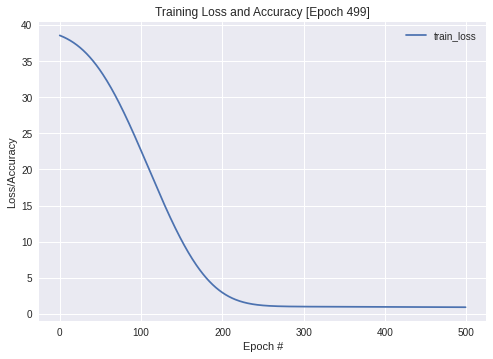

1/1 [==============================] - 0s 218ms/step - loss: 0.9158


In [81]:
model.fit(xs, ys, epochs=500, callbacks=[plot_losses])

Scikit Learn

In [82]:
regressor = LinearRegression()  
regressor.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
regressor.coef_[0]

array([1.  , 0.05, 0.5 , 0.05])

In [83]:
model.get_weights()

[array([[ 0.27468514,  0.36486048,  0.01113618,  0.03273553],
        [ 0.27314603,  0.31219876, -0.05393312, -0.00808537],
        [ 0.27995622,  0.24764524,  0.09212486,  0.095858  ],
        [ 0.23389894,  0.28018194, -0.03716088, -0.04149261]],
       dtype=float32),
 array([0.2392375 , 0.26500317, 0.        , 0.        ], dtype=float32),
 array([[ 0.34290195],
        [ 0.29623398],
        [-0.07220574],
        [-0.00739691]], dtype=float32),
 array([0.16785799], dtype=float32)]

Load Ideal Weights for Single Neuron - Problem how to get this weights with Deep Network?

In [0]:
ideal = [np.array([[ 1.0  ],
        [0.05],
        [ 0.5],
        [ 0.05]], dtype="float32"), np.array([1.0], dtype="float32")]
model.set_weights(ideal)

In [0]:
test_x=[[ 0.0,4.0,0.0,3.0],
[ 0.0,7.0,1.0,4.0],
[ 1.0,10.0,1.0,7.0],
[ 2.0,20.0,2.0,10.0],
[ 4.0,20.0,4.0,10.0],
[ 3.0,30.0,4.0,10.0]]

test_y = [1.35,
2.05,
3.35,
5.5,
8.5,
8]

In [0]:
nn_pred =model.predict(test_x)

In [0]:
sk_pred = regressor.predict(test_x)

In [87]:
df = pd.DataFrame({'Actual': test_y, 'NN Predicted': nn_pred.squeeze(), "SK Predicted": sk_pred.squeeze()})
df.head(6)

,Actual,NN Predicted,SK Predicted
0,1.35,1.562592,1.35
1,2.05,2.453593,2.05
2,3.35,3.703917,3.35
3,5.50,6.426623,5.50
4,8.50,7.169888,8.50
5,8.00,8.829077,8.00
